Morse Potential and Centrifugal Correction of Carbon Monoxide

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.constants import hbar, k_B, m_p
import astropy.units as u

In [2]:
def morse_potential(r,params):
    """_summary_

    Args:
        r (flaot/nd array): internuclear distance
        params (array): Morse parameters [equilibrium distance (A), alpha, De]

    Returns:
        float/nd array: Morse potential 
    """
    re,alpha,De = params
    print(re,alpha,De)
    return De*(1.0 - np.exp(-alpha*(r-re)) )**2

In [4]:
mO = m_p*16
mC = m_p*12
m = mO*mC/(mO+mC)
convert_factor = ((hbar**2/(2*m*(1.0*u.Angstrom.to(u.m)*u.m)**2)/k_B).to(u.K)).value # (K)

def centrifugal_potential(r,J):
    """
    Args:
        r (float/nd array): internuclear distance (AA)
        J (int): rotational quantum number J

    Returns:
        flaot/nd array: centrifugal potential
    """
    return convert_factor*J*(J+1)/r**2

In [5]:
r = np.linspace(3.0,10.0,1000)
params_CO = [4.27,1.136,100.3] # re [A], alpha[A-1], [D/kB] K 
#ref: Matsumoto 1987 Parameters of the Morse Potential from Second Virial Coefficients of Gases

#Morse potential w/ J=0, 10, 20, 30, and 40
Vco = morse_potential(r,params_CO)
Vrot10 = Vco+centrifugal_potential(r,10)
Vrot20 = Vco+centrifugal_potential(r,20)
Vrot30 = Vco+centrifugal_potential(r,30)
Vrot40 = Vco+centrifugal_potential(r,40)

4.27 1.136 100.3


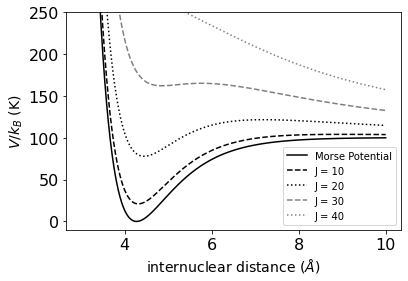

In [7]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(r, Vco, color="black",label="Morse Potential")
ax.plot(r, Vrot10, color="black", ls="dashed", label="J = 10")
ax.plot(r, Vrot20, color="black", ls="dotted", label="J = 20")
ax.plot(r, Vrot30, color="gray", ls="dashed", label="J = 30")
ax.plot(r, Vrot40, color="gray", ls="dotted", label="J = 40")
plt.ylim(-10.0,250)
plt.ylabel("$V/k_B$ (K)",fontsize=14)
plt.xlabel("internuclear distance ($\AA$)",fontsize=14)
plt.tick_params(labelsize=16)
plt.legend(fontsize=10)
#plt.savefig("morse_co.pdf", bbox_inches="tight", pad_inches=0.0)
plt.savefig("morse_co.png", bbox_inches="tight", pad_inches=0.1)
plt.show()